In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Text(0.5, 1.0, 'Original image')

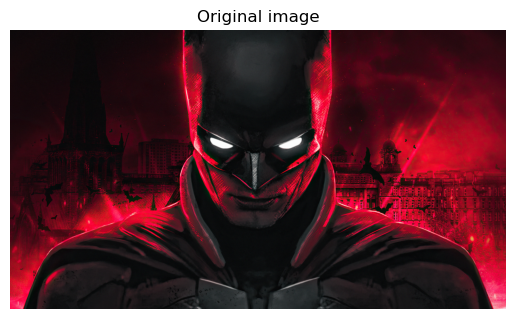

In [2]:
image=cv2.imread(r'C:\Users\student\Desktop\CV20\Batman.jpg')
image2=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.axis('off')
plt.title('Original image')

In [3]:
image2.shape

(2160, 3840, 3)

In [28]:
def translation(x,y,image):
    matrix=np.array([[1,0,x],
           [0,1,y],
           [0,0,1]])
    height,width,channel=image.shape
    
    image2=np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            matrix2=np.array([j,i,1])
            np_coord=np.dot(matrix,matrix2)
            
            new_x,new_y=int(np_coord[0]),int(np_coord[1])
            
            if 0 <= new_x < width and 0 <= new_y < height:
                image2[new_y, new_x] = image[i, j]
    return image2

In [94]:
new=translation(500,500,image2)

Text(0.5, 1.0, 'Traslated image')

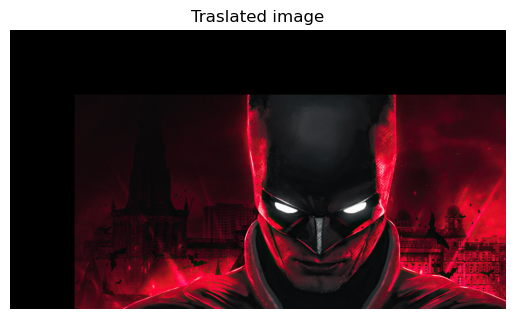

In [95]:
plt.imshow(new)
plt.axis('off')
plt.title('Traslated image')

In [52]:
def scaling(x,y,image):
    matrix=np.array([[x,0,0],
           [0,y,0],
           [0,0,1]])
    height,width,channel=image.shape
    
    new_h=int(height*y)
    new_w=int(width*x)
    
    image2=np.zeros((new_h,new_w,channel), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            matrix2=np.array([j,i,1])
            np_coord=np.dot(matrix,matrix2)
            
            new_x,new_y=int(np_coord[0]),int(np_coord[1])
            
            if 0 <= new_x < new_w and 0 <= new_y < new_h:
                image2[new_y, new_x] = image[i, j]
    return image2

In [64]:
new=scaling(0.3,0.6,image2)

Text(0.5, 1.0, 'original image')

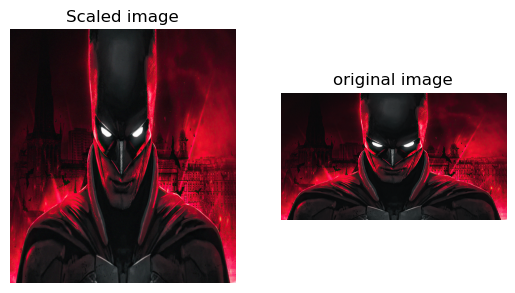

In [65]:
plt.subplot(1,2,1)
plt.imshow(new)
plt.axis('off')
plt.title('Scaled image')

plt.subplot(1,2,2)
plt.imshow(image2)
plt.axis('off')
plt.title('original image')

In [66]:
new.shape

(1296, 1152, 3)

In [183]:
def rotation(q,image):
    matrix=np.array([[math.cos(q),-math.sin(q),0],
           [math.sin(q),math.cos(q),0],
           [0,0,1]])
    height,width,channel=image.shape
    
    new_h=int(abs(height*math.cos(q))+abs(width*math.sin(q)))
    new_w=int(abs(width*math.cos(q))+abs(height*math.sin(q)))
    
    image2=np.zeros((new_h,new_w,channel),dtype=np.uint8)
    
    center_x,center_y=width//2,height//2
    new_center_x,new_center_y=new_w//2,new_h//2
    
    for i in range(height):
        for j in range(width):
            matrix2=np.array([j-center_x,i-center_y,1])
            np_coord=np.dot(matrix,matrix2)
        
            new_x,new_y=int(np_coord[0]+new_center_x),int(np_coord[1]+new_center_y)
            
            if 0 <= new_x < new_w and 0 <= new_y < new_h:
                image2[new_y, new_x] = image[i, j]
    return image2

In [184]:
new=rotation(180,image2)

Text(0.5, 1.0, 'Rotated image')

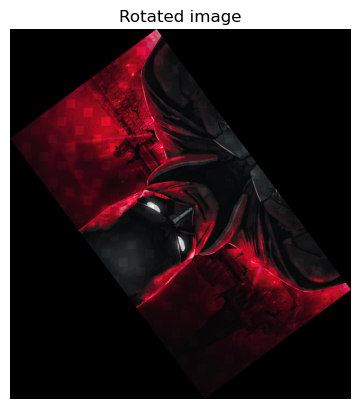

In [185]:
plt.imshow(new)
plt.axis('off')
plt.title('Rotated image')

In [197]:
def reflect(a,image):
    
    height,width,channel=image.shape
    
    if a=='x':
         matrix=np.array([[1,0,0],
           [0,-1,height],
           [0,0,1]])
    else:
        matrix=np.array([[-1,0,width],
           [0,1,0],
           [0,0,1]])
    
    
    image2=np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            matrix2=np.array([j,i,1])
            np_coord=np.dot(matrix,matrix2)
            
            new_x,new_y=int(np_coord[0]),int(np_coord[1])
            
            if 0 <= new_x < width and 0 <= new_y < height:
                image2[new_y, new_x] = image[i, j]
    return image2

In [198]:
ref_x=reflect('x',image2)
ref_y=reflect('y',image2)

Text(0.5, 1.0, 'Reflected image')

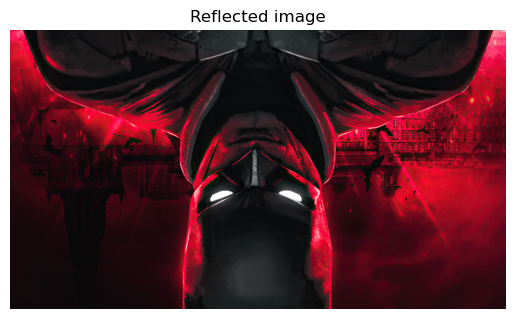

In [199]:
plt.subplot(1,2,1)
plt.imshow(ref_x)
plt.axis('off')
plt.title('Reflected image with axis X')

plt.subplot(1,2,1)
plt.imshow(ref_y)
plt.axis('off')
plt.title('Reflected image with axis Y')